## Term Project Sales for SCS 3253_057 - Sales Forecast by Yidan Xu

In [17]:
import numpy as np
#work with arrays, linear algebra etc
import pandas as pd
#data processing
import matplotlib.pyplot as plt
#plt provides an implicit way of plotting
import seaborn as sns
# data visualization library based on matplotlib

In [18]:
data=pd.read_csv('./SalesForecast/WeeklySalesData.csv')

## Descriptive Analysis

In [19]:
print(data.head())

   PRODUCT  WEEKNO  MONTHNO  REGION  ORDERQTY
0        1      10        3       4        40
1        1      43       10       1       101
2        1      15        4       4        25
3        1      13        3       4         9
4        1      62       15       4       114


In [20]:
print(data.shape)

(33899, 5)


In [21]:
data.describe()

,PRODUCT,WEEKNO,MONTHNO,REGION,ORDERQTY
count,33899.000000,33899.000000,33899.000000,33899.000000,33899.000000
mean,68.749108,54.058527,12.872386,2.555828,163.047583
std,41.987151,30.085616,6.925512,1.122965,1172.188573
min,1.000000,1.000000,1.000000,1.000000,1.000000
25%,30.000000,29.000000,7.000000,2.000000,8.000000
50%,68.000000,53.000000,13.000000,3.000000,31.000000
75%,103.000000,80.000000,19.000000,4.000000,105.000000
max,163.000000,105.000000,25.000000,4.000000,137500.000000


In [22]:
data.dtypes.value_counts()

int64    5
dtype: int64

In [23]:
data[data.columns].isnull().sum()

PRODUCT     0
WEEKNO      0
MONTHNO     0
REGION      0
ORDERQTY    0
dtype: int64

In [24]:
data.dtypes

PRODUCT     int64
WEEKNO      int64
MONTHNO     int64
REGION      int64
ORDERQTY    int64
dtype: object

In [25]:
# using dictionary to convert specific columns
convert_dict = { 'PRODUCT': str,
                'REGION': str
                }
 
data = data.astype(convert_dict)
print(data.dtypes)

PRODUCT     object
WEEKNO       int64
MONTHNO      int64
REGION      object
ORDERQTY     int64
dtype: object


/opt/conda/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

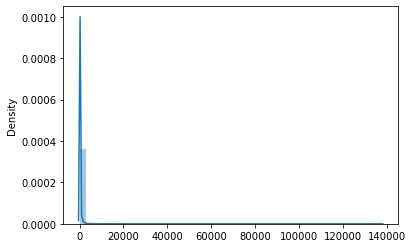

In [26]:
sns.distplot([data['ORDERQTY'].values])

In [27]:
databyprd = pd.pivot_table(data, values = 'ORDERQTY', index=['PRODUCT', 'REGION'], columns = 'WEEKNO')#.reset_index()

In [28]:
databyprd

WEEKNO          1    2    3      4    5      6      7     8     9      10   \
PRODUCT REGION                                                               
1       1       NaN  NaN  NaN    NaN  NaN    NaN    NaN   NaN   NaN  196.0   
        2       NaN  NaN  NaN    NaN  NaN    NaN    NaN   NaN   NaN    8.0   
        3       NaN  NaN  NaN    NaN  NaN    NaN    NaN   NaN   NaN   37.0   
        4       NaN  NaN  NaN    NaN  NaN    NaN    NaN   NaN   NaN   40.0   
10      1       1.0  NaN  1.0  100.0  5.0  644.0  450.0  68.0  15.0   82.0   
...             ...  ...  ...    ...  ...    ...    ...   ...   ...    ...   
98      4       NaN  NaN  NaN    NaN  NaN    NaN    NaN   NaN   NaN    NaN   
99      1       NaN  NaN  NaN    NaN  NaN    NaN    NaN   NaN   NaN    NaN   
        2       NaN  NaN  NaN    NaN  NaN    NaN    NaN   NaN   NaN    NaN   
        3       NaN  NaN  NaN    NaN  NaN    NaN    NaN   NaN   NaN    NaN   
        4       NaN  NaN  NaN    NaN  NaN    NaN    NaN   NaN   NaN    NaN   

WEEKNO          ...   96    97    98   99    100   101    102    103    104  \
PRODUCT REGION  ...                                                           
1       1       ...   NaN   NaN   NaN  NaN   NaN   NaN    NaN    NaN    NaN   
        2       ...   NaN   NaN   NaN  NaN   NaN   NaN    NaN    NaN    NaN   
        3       ...   NaN   NaN   NaN  NaN   NaN   NaN    NaN    NaN    NaN   
        4       ...   NaN   NaN   NaN  NaN   NaN   NaN    NaN    NaN    NaN   
10      1       ...  49.0  75.0  24.0  8.0  16.0  72.0  117.0   78.0   39.0   
...             ...   ...   ...   ...  ...   ...   ...    ...    ...    ...   
98      4       ...   NaN   NaN   NaN  NaN   NaN   NaN    NaN    NaN    NaN   
99      1       ...   NaN   NaN   NaN  NaN   NaN  37.0   14.0   14.0    NaN   
        2       ...   NaN   NaN   NaN  NaN   NaN   2.0    2.0    3.0    NaN   
        3       ...   NaN   NaN   NaN  NaN   NaN  46.0   40.0  204.0  118.0   
        4       ...   NaN   NaN   NaN  NaN   NaN   9.0   21.0    NaN    NaN   

WEEKNO           105  
PRODUCT REGION        
1       1        NaN  
        2        NaN  
        3        NaN  
        4        NaN  
10      1       90.0  
...              ...  
98      4        NaN  
99      1        4.0  
        2        9.0  
        3       16.0  
        4        5.0  

[632 rows x 105 columns]

In [29]:
print(weeklydata.head())

   PRODUCT  WEEKNO  REGION  ORDERQTY
0        1       1       1         0
1        1       2       1         0
2        1       3       1         0
3        1       4       1         0
4        1       5       1         0


## Preprocessing

### Impute data points with 0 sales

In [30]:
#databyprd shows NaN cells, which mean 0 weekly sales have not yet been captured.
weeklydata = data.drop(columns=["MONTHNO"])

In [31]:
#generate temp key for old data dict (without 0 sales)
old_data_dict ={}
for i in range(len(weeklydata)):
    tmp_key = str(weeklydata.iloc[i][0]) + '-' + str(weeklydata.iloc[i][1]) + '-' + str(weeklydata.iloc[i][2])
    old_data_dict[tmp_key]=weeklydata.iloc[i][3]

In [32]:
import numpy as np
product_num = np.max(weeklydata['PRODUCT'])
week_num = np.max(weeklydata['WEEKNO'])
region_num = np.max(weeklydata['REGION'])

product_num=163
region=numb
#impute 0 sales data points into data_dict_list
data_dict_list = []
for p_i in range(1,product_num+1):
    for r_i in range(1,region_num+1):
        for w_i in range(1,week_num+1):
            tmp = {}
            tmp['PRODUCT'] = p_i
            tmp['REGION'] = r_i
            tmp['WEEKNO'] = w_i
            tmpkey= str(p_i) + '-' + str(w_i) + '-' +str(r_i)
            if tmpkey in old_data_dict:
                tmp['ORDERQTY'] = old_data_dict[tmpkey]
            else:
                tmp['ORDERQTY'] = 0
            data_dict_list.append(tmp)

weeklydata=pd.DataFrame(data=data_dict_list, columns = ['PRODUCT', 'WEEKNO', 'REGION', 'ORDERQTY'])
print(weeklydata)

TypeError: can only concatenate str (not "int") to str

## Model Pre-Selection

In [ ]:
# init setup
import pycaret
from pycaret.regression import * 

In [37]:
# compare models using pycarets, get best hyperparameters and random_state
# Training separately for each region as there are too many products
dict_region1= {}

for p in (1,product_num+1):
     for r in range(1,region_num+1):
        data1=weeklydata.iloc[(week_num*4*(p-1)+week_num*(r-1)):((week_num*4*(p-1)+week_num*r)),:]
        #print(data1)
        data2=data1[['WEEKNO', 'ORDERQTY']]
        #print(data2)
        s = setup(data2, target = 'ORDERQTY', fold=5)
        print('the best model for product '+ str(p) + ' in region ' + str(1) + 'is ')
        best = compare_models(sort = 'MAE')
        print(best)
        if type(best) in dict_region1:
            dict_region1[type(best)]+=1
        else:
            dict_region1[type(best)] = 1
        print(dict_region1) 
    #     break
    # break

print(dict_region1)   


,Description,Value
0,Session id,3239
1,Target,ORDERQTY
2,Target type,Regression
3,Data shape,"(105, 2)"
4,Train data shape,"(73, 2)"
5,Test data shape,"(32, 2)"
6,Numeric features,1
7,Preprocess,1
8,Imputation type,simple
9,Numeric imputation,mean


the best model for product 1 in region 1is 


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
huber,Huber Regressor,7.8896,761.5801,20.1945,-0.1985,1.4694,1.0000,0.0180
rf,Random Forest Regressor,9.2199,685.1661,23.5939,-4.4497,0.9706,1.6072,0.0820
et,Extra Trees Regressor,9.6527,742.3927,24.3081,-4.7719,0.9850,1.4204,0.0720
xgboost,Extreme Gradient Boosting,10.1294,1008.6163,27.8364,-7.5569,0.8835,1.3871,0.5460
par,Passive Aggressive Regressor,10.3589,788.3123,21.7071,-1.1803,1.6666,0.7665,0.0200
dt,Decision Tree Regressor,10.5610,1007.4657,29.3443,-8.9301,0.8450,1.8211,0.0120
gbr,Gradient Boosting Regressor,10.6111,996.9524,29.1519,-8.6514,0.8566,1.8030,0.0180
knn,K Neighbors Regressor,10.7061,752.1610,24.1530,-8.8812,1.3033,1.9721,0.0160
dummy,Dummy Regressor,12.3431,726.5447,21.2742,-1.4362,2.0239,0.4087,0.0120
llar,Lasso Least Angle Regression,12.3431,726.5447,21.2742,-1.4362,2.0239,0.4087,0.0120


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

HuberRegressor()
{<class 'sklearn.linear_model._huber.HuberRegressor'>: 1}


,Description,Value
0,Session id,370
1,Target,ORDERQTY
2,Target type,Regression
3,Data shape,"(105, 2)"
4,Train data shape,"(73, 2)"
5,Test data shape,"(32, 2)"
6,Numeric features,1
7,Preprocess,1
8,Imputation type,simple
9,Numeric imputation,mean


the best model for product 1 in region 1is 


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
huber,Huber Regressor,7.3943,785.1826,20.2005,-0.1638,1.3619,1.0000,0.0160
knn,K Neighbors Regressor,8.0210,593.7029,19.2130,-2.1143,1.1320,3.1454,0.0140
rf,Random Forest Regressor,8.8920,894.7093,23.1296,-3.5986,0.9709,5.1777,0.0660
et,Extra Trees Regressor,9.6326,996.2369,25.3132,-4.1607,1.0008,5.3267,0.0580
par,Passive Aggressive Regressor,9.6449,808.3519,20.9222,-0.2984,1.5619,1.3308,0.0100
gbr,Gradient Boosting Regressor,10.1617,1329.0011,28.4956,-4.6739,1.0631,6.3818,0.0140
dt,Decision Tree Regressor,10.2429,1359.0790,28.8919,-5.2090,1.0719,6.5392,0.0120
xgboost,Extreme Gradient Boosting,11.4704,1642.7009,31.4317,-8.0048,1.0447,7.0302,0.5620
lightgbm,Light Gradient Boosting Machine,11.6595,676.7092,20.8646,-3.3327,1.8103,1.4338,0.0520
ada,AdaBoost Regressor,11.9337,1358.4410,29.6611,-4.9208,1.4895,7.0521,0.0240


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

HuberRegressor()
{<class 'sklearn.linear_model._huber.HuberRegressor'>: 2}


,Description,Value
0,Session id,1013
1,Target,ORDERQTY
2,Target type,Regression
3,Data shape,"(105, 2)"
4,Train data shape,"(73, 2)"
5,Test data shape,"(32, 2)"
6,Numeric features,1
7,Preprocess,1
8,Imputation type,simple
9,Numeric imputation,mean


the best model for product 1 in region 1is 


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
huber,Huber Regressor,12.5308,1290.3410,33.2076,-0.2050,1.7533,1.0000,0.0200
knn,K Neighbors Regressor,13.5918,1120.5117,30.5108,-0.0366,1.4604,0.6560,0.0120
par,Passive Aggressive Regressor,13.8927,1300.8120,33.3618,-0.2125,1.7085,1.0049,0.0100
rf,Random Forest Regressor,14.7722,1436.6820,35.9925,-0.8317,1.1763,1.0084,0.0680
et,Extra Trees Regressor,15.6887,1478.0985,36.9927,-1.0043,1.0535,1.2638,0.0560
lightgbm,Light Gradient Boosting Machine,16.9887,1134.0318,30.3918,0.0326,2.1491,0.5834,0.1600
gbr,Gradient Boosting Regressor,18.2111,2246.7944,46.3262,-2.7424,1.4031,1.3561,0.0180
dt,Decision Tree Regressor,18.2952,2296.1771,46.8801,-2.9333,1.4118,1.3762,0.0120
xgboost,Extreme Gradient Boosting,18.3466,2346.6368,46.9862,-3.0770,1.3018,1.6479,0.6580
ada,AdaBoost Regressor,19.8292,2166.1334,45.4610,-2.5648,1.6536,1.3820,0.0240


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

HuberRegressor()
{<class 'sklearn.linear_model._huber.HuberRegressor'>: 3}


,Description,Value
0,Session id,7776
1,Target,ORDERQTY
2,Target type,Regression
3,Data shape,"(105, 2)"
4,Train data shape,"(73, 2)"
5,Test data shape,"(32, 2)"
6,Numeric features,1
7,Preprocess,1
8,Imputation type,simple
9,Numeric imputation,mean


the best model for product 1 in region 1is 


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
huber,Huber Regressor,20.7108,4388.2513,58.3161,-0.1754,1.8777,1.0000,0.0140
xgboost,Extreme Gradient Boosting,30.6439,6509.4616,79.2105,-7.8938,1.5952,1.8907,0.7720
et,Extra Trees Regressor,31.3471,5928.4454,75.2029,-10.9627,1.6596,1.5869,0.0520
knn,K Neighbors Regressor,32.3872,4478.3556,62.6111,-4.7979,2.2161,1.3273,0.0140
dummy,Dummy Regressor,33.2816,4009.0362,57.3548,-0.9847,2.7970,0.7313,0.0100
llar,Lasso Least Angle Regression,33.4358,4028.8431,57.4545,-0.9867,2.8040,0.7320,0.0100
br,Bayesian Ridge,33.7178,4069.4384,57.6583,-0.9908,2.8135,0.7330,0.0120
rf,Random Forest Regressor,34.7541,6356.6680,76.1551,-11.6364,2.0019,1.4249,0.0740
lasso,Lasso Regression,34.7984,4197.1831,58.4103,-0.9627,2.8507,0.7259,0.0260
dt,Decision Tree Regressor,34.8000,8625.0876,87.9454,-15.1147,1.8446,1.3372,0.0120


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

HuberRegressor()
{<class 'sklearn.linear_model._huber.HuberRegressor'>: 4}


,Description,Value
0,Session id,8338
1,Target,ORDERQTY
2,Target type,Regression
3,Data shape,"(105, 2)"
4,Train data shape,"(73, 2)"
5,Test data shape,"(32, 2)"
6,Numeric features,1
7,Preprocess,1
8,Imputation type,simple
9,Numeric imputation,mean


the best model for product 4 in region 1is 


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
knn,K Neighbors Regressor,22.6112,1704.2631,39.2600,-0.0308,1.0291,1.1708,0.0220
rf,Random Forest Regressor,24.7616,2347.5786,47.7347,-0.7645,0.9114,1.3973,0.0740
huber,Huber Regressor,25.5041,1845.0550,40.5410,-0.1090,1.9287,0.8099,0.0140
lightgbm,Light Gradient Boosting Machine,25.8107,1744.3818,39.3207,-0.0358,1.8152,1.0086,0.3560
et,Extra Trees Regressor,26.2960,2664.0311,50.9816,-1.2050,0.9672,1.4337,0.0720
lasso,Lasso Regression,27.4364,1830.5205,40.7044,-0.1144,2.0306,0.8897,0.0200
en,Elastic Net,27.4366,1830.5196,40.7038,-0.1144,2.0310,0.8899,0.0120
ridge,Ridge Regression,27.4402,1830.7328,40.7050,-0.1145,2.0322,0.8904,0.0100
lar,Least Angle Regression,27.4403,1830.7365,40.7050,-0.1145,2.0323,0.8904,0.0140
lr,Linear Regression,27.4403,1830.7365,40.7050,-0.1145,2.0323,0.8904,0.0260


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

KNeighborsRegressor(n_jobs=-1)
{<class 'sklearn.linear_model._huber.HuberRegressor'>: 4, <class 'sklearn.neighbors._regression.KNeighborsRegressor'>: 1}


,Description,Value
0,Session id,4327
1,Target,ORDERQTY
2,Target type,Regression
3,Data shape,"(105, 2)"
4,Train data shape,"(73, 2)"
5,Test data shape,"(32, 2)"
6,Numeric features,1
7,Preprocess,1
8,Imputation type,simple
9,Numeric imputation,mean


the best model for product 4 in region 1is 


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,11.5734,458.0045,20.2056,0.0276,0.7021,1.2358,0.0700
knn,K Neighbors Regressor,11.5914,449.6848,19.8095,0.1017,0.8186,1.2861,0.0140
lightgbm,Light Gradient Boosting Machine,12.0247,385.4077,17.9050,0.3443,1.3854,1.0141,0.2420
rf,Random Forest Regressor,12.4087,499.0156,21.5286,-0.2114,0.7850,1.2765,0.0800
xgboost,Extreme Gradient Boosting,12.9998,444.7434,20.0320,0.0168,0.7911,1.4118,1.1040
gbr,Gradient Boosting Regressor,13.5631,556.9543,22.3684,-0.3941,0.8873,1.2268,0.0160
dt,Decision Tree Regressor,14.0143,575.3019,22.8212,-0.4758,0.9190,1.2552,0.0120
huber,Huber Regressor,14.2842,492.1474,20.2284,0.1520,1.5981,1.1302,0.0120
ridge,Ridge Regression,14.8368,497.5327,20.4182,0.1515,1.7640,1.1246,0.0120
lar,Least Angle Regression,14.8368,497.5332,20.4182,0.1515,1.7640,1.1246,0.0120


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

ExtraTreesRegressor(n_jobs=-1, random_state=4327)
{<class 'sklearn.linear_model._huber.HuberRegressor'>: 4, <class 'sklearn.neighbors._regression.KNeighborsRegressor'>: 1, <class 'sklearn.ensemble._forest.ExtraTreesRegressor'>: 1}


,Description,Value
0,Session id,922
1,Target,ORDERQTY
2,Target type,Regression
3,Data shape,"(105, 2)"
4,Train data shape,"(73, 2)"
5,Test data shape,"(32, 2)"
6,Numeric features,1
7,Preprocess,1
8,Imputation type,simple
9,Numeric imputation,mean


the best model for product 4 in region 1is 


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
knn,K Neighbors Regressor,82.8044,18540.1101,133.3188,0.3677,1.0152,0.9436,0.0140
rf,Random Forest Regressor,88.4164,25514.6002,152.4818,0.1422,0.8397,0.9704,0.0940
et,Extra Trees Regressor,89.5364,29580.2853,161.5893,0.0833,0.8134,0.9493,0.0740
gbr,Gradient Boosting Regressor,97.6547,34584.7180,172.7332,-0.0537,1.0737,0.9212,0.0160
dt,Decision Tree Regressor,99.9457,36569.2943,177.5202,-0.1023,0.8089,0.9556,0.0120
ada,AdaBoost Regressor,100.0012,31206.3625,166.2481,-0.0018,1.5131,1.0520,0.0240
xgboost,Extreme Gradient Boosting,100.0561,37862.8330,180.8011,-0.1295,0.8144,0.9656,0.8860
lightgbm,Light Gradient Boosting Machine,106.5278,20013.1398,139.9089,0.2501,2.3262,1.0575,0.2680
lr,Linear Regression,137.7251,26508.6763,161.5634,-0.0319,2.7685,1.1461,0.0280
lar,Least Angle Regression,137.7251,26508.6763,161.5634,-0.0319,2.7685,1.1461,0.0120


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

KNeighborsRegressor(n_jobs=-1)
{<class 'sklearn.linear_model._huber.HuberRegressor'>: 4, <class 'sklearn.neighbors._regression.KNeighborsRegressor'>: 2, <class 'sklearn.ensemble._forest.ExtraTreesRegressor'>: 1}


,Description,Value
0,Session id,6142
1,Target,ORDERQTY
2,Target type,Regression
3,Data shape,"(105, 2)"
4,Train data shape,"(73, 2)"
5,Test data shape,"(32, 2)"
6,Numeric features,1
7,Preprocess,1
8,Imputation type,simple
9,Numeric imputation,mean


the best model for product 4 in region 1is 


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
knn,K Neighbors Regressor,43.6265,4598.2234,65.6977,-0.0103,1.1649,3.0733,0.0140
lightgbm,Light Gradient Boosting Machine,46.3975,4307.3130,62.6112,0.0909,2.0522,2.6585,0.2100
rf,Random Forest Regressor,46.8649,5840.3120,75.3191,-0.3494,1.0383,3.5070,0.0740
et,Extra Trees Regressor,47.0691,5805.9886,75.2808,-0.3725,1.0755,3.2004,0.0680
huber,Huber Regressor,49.9433,4939.4918,64.5364,0.1310,2.4293,2.4819,0.0120
xgboost,Extreme Gradient Boosting,50.7025,7174.2644,84.3269,-0.8649,1.1385,2.3201,1.2780
gbr,Gradient Boosting Regressor,51.1749,7270.8323,84.0117,-0.7330,1.1576,4.1957,0.0180
lar,Least Angle Regression,51.9133,4879.0471,65.4177,0.0797,2.5309,2.7066,0.0120
omp,Orthogonal Matching Pursuit,51.9133,4879.0471,65.4177,0.0797,2.5309,2.7066,0.0120
lr,Linear Regression,51.9133,4879.0471,65.4177,0.0797,2.5309,2.7066,0.0340


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

KNeighborsRegressor(n_jobs=-1)
{<class 'sklearn.linear_model._huber.HuberRegressor'>: 4, <class 'sklearn.neighbors._regression.KNeighborsRegressor'>: 3, <class 'sklearn.ensemble._forest.ExtraTreesRegressor'>: 1}


,Description,Value
0,Session id,2755
1,Target,ORDERQTY
2,Target type,Regression
3,Data shape,"(105, 2)"
4,Train data shape,"(73, 2)"
5,Test data shape,"(32, 2)"
6,Numeric features,1
7,Preprocess,1
8,Imputation type,simple
9,Numeric imputation,mean


the best model for product 6 in region 1is 


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
huber,Huber Regressor,30.2329,6551.0195,68.8758,0.1619,1.5055,0.8064,0.0160
lightgbm,Light Gradient Boosting Machine,37.6341,6190.6916,70.5973,-0.1779,1.1767,1.9736,0.2000
par,Passive Aggressive Regressor,37.7268,7000.8884,74.8268,-0.3110,1.9842,0.8644,0.0100
knn,K Neighbors Regressor,39.1796,7195.4893,79.7741,-1.0165,1.1475,2.2262,0.0180
llar,Lasso Least Angle Regression,39.9908,5982.9613,69.3064,-0.1166,1.9102,1.8251,0.0120
br,Bayesian Ridge,41.6636,5915.6389,69.6886,-0.2071,1.9499,2.0134,0.0100
en,Elastic Net,42.6828,5916.1825,70.0590,-0.2628,1.9873,2.0923,0.0100
lasso,Lasso Regression,42.6850,5916.3135,70.0606,-0.2630,1.9873,2.0924,0.0200
ridge,Ridge Regression,42.6990,5916.2443,70.0650,-0.2637,1.9879,2.0936,0.0100
omp,Orthogonal Matching Pursuit,42.6993,5916.2476,70.0652,-0.2637,1.9879,2.0936,0.0120


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

HuberRegressor()
{<class 'sklearn.linear_model._huber.HuberRegressor'>: 5, <class 'sklearn.neighbors._regression.KNeighborsRegressor'>: 3, <class 'sklearn.ensemble._forest.ExtraTreesRegressor'>: 1}


,Description,Value
0,Session id,7541
1,Target,ORDERQTY
2,Target type,Regression
3,Data shape,"(105, 2)"
4,Train data shape,"(73, 2)"
5,Test data shape,"(32, 2)"
6,Numeric features,1
7,Preprocess,1
8,Imputation type,simple
9,Numeric imputation,mean


the best model for product 6 in region 1is 


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
rf,Random Forest Regressor,15.0384,672.3682,24.9310,0.3807,0.5671,0.7555,0.0760
gbr,Gradient Boosting Regressor,15.1467,741.5501,26.3523,0.2472,0.5215,0.7348,0.0160
ada,AdaBoost Regressor,15.2073,652.1314,24.2678,0.3552,0.5317,0.8905,0.0220
dt,Decision Tree Regressor,15.4924,777.8714,26.9527,0.2069,0.5193,0.7533,0.0120
et,Extra Trees Regressor,16.0621,744.1541,26.6299,0.3090,0.6176,0.7824,0.0580
xgboost,Extreme Gradient Boosting,16.2283,911.4163,29.8235,0.1431,0.5703,0.8013,0.6940
knn,K Neighbors Regressor,17.0493,780.5835,27.0168,0.3022,0.7157,0.9578,0.0140
lightgbm,Light Gradient Boosting Machine,17.3288,766.5086,26.6011,0.3446,0.7643,0.9647,0.2140
huber,Huber Regressor,19.2413,853.6039,27.8025,0.3297,1.5125,0.7955,0.0120
br,Bayesian Ridge,20.1884,834.7341,27.8171,0.2881,1.6077,0.9300,0.0100


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

RandomForestRegressor(n_jobs=-1, random_state=7541)
{<class 'sklearn.linear_model._huber.HuberRegressor'>: 5, <class 'sklearn.neighbors._regression.KNeighborsRegressor'>: 3, <class 'sklearn.ensemble._forest.ExtraTreesRegressor'>: 1, <class 'sklearn.ensemble._forest.RandomForestRegressor'>: 1}


,Description,Value
0,Session id,7146
1,Target,ORDERQTY
2,Target type,Regression
3,Data shape,"(105, 2)"
4,Train data shape,"(73, 2)"
5,Test data shape,"(32, 2)"
6,Numeric features,1
7,Preprocess,1
8,Imputation type,simple
9,Numeric imputation,mean


the best model for product 6 in region 1is 


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,34.5698,5711.8725,61.6723,0.4211,0.6688,0.7629,0.0600
ada,AdaBoost Regressor,34.7201,6650.7135,67.0751,0.4422,0.7034,0.6981,0.0300
lightgbm,Light Gradient Boosting Machine,37.6860,7066.3046,67.8601,0.4045,0.8395,0.9131,0.3260
rf,Random Forest Regressor,37.9351,6376.3563,65.7763,0.3293,0.7954,0.9704,0.0720
gbr,Gradient Boosting Regressor,38.7856,7163.5740,70.8704,0.3086,0.6882,0.8292,0.0200
dt,Decision Tree Regressor,39.8648,7365.6190,72.7536,0.2467,0.7210,0.8705,0.0160
knn,K Neighbors Regressor,39.9080,7715.6787,73.6287,0.0960,0.9537,1.1116,0.0160
xgboost,Extreme Gradient Boosting,40.1199,7485.8090,73.0705,0.2376,0.7745,0.8592,1.6420
huber,Huber Regressor,48.8892,7688.4626,74.0591,0.3171,2.1001,0.8344,0.0140
llar,Lasso Least Angle Regression,48.9353,7383.7786,72.1625,0.3399,2.2858,0.8871,0.0120


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

ExtraTreesRegressor(n_jobs=-1, random_state=7146)
{<class 'sklearn.linear_model._huber.HuberRegressor'>: 5, <class 'sklearn.neighbors._regression.KNeighborsRegressor'>: 3, <class 'sklearn.ensemble._forest.ExtraTreesRegressor'>: 2, <class 'sklearn.ensemble._forest.RandomForestRegressor'>: 1}


,Description,Value
0,Session id,2423
1,Target,ORDERQTY
2,Target type,Regression
3,Data shape,"(105, 2)"
4,Train data shape,"(73, 2)"
5,Test data shape,"(32, 2)"
6,Numeric features,1
7,Preprocess,1
8,Imputation type,simple
9,Numeric imputation,mean


the best model for product 6 in region 1is 


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,39.0047,5273.5809,66.2907,0.0484,1.3189,1.3509,0.2580
huber,Huber Regressor,40.7893,6177.0770,69.4763,0.1324,1.8771,0.9148,0.0140
knn,K Neighbors Regressor,41.6550,5607.9123,71.6129,-0.5549,1.1577,1.5166,0.0140
br,Bayesian Ridge,46.2248,5898.2655,70.8846,-0.0707,2.1836,1.3144,0.0100
en,Elastic Net,46.2413,5894.4621,71.0260,-0.0874,2.1522,1.3650,0.0100
lasso,Lasso Regression,46.2419,5894.5659,71.0269,-0.0874,2.1522,1.3651,0.0200
ridge,Ridge Regression,46.2445,5894.5402,71.0291,-0.0876,2.1521,1.3657,0.0120
omp,Orthogonal Matching Pursuit,46.2446,5894.5436,71.0292,-0.0877,2.1521,1.3657,0.0120
lr,Linear Regression,46.2446,5894.5436,71.0292,-0.0877,2.1521,1.3657,0.0240
lar,Least Angle Regression,46.2446,5894.5436,71.0292,-0.0877,2.1521,1.3657,0.0140


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

LGBMRegressor(random_state=2423)
{<class 'sklearn.linear_model._huber.HuberRegressor'>: 5, <class 'sklearn.neighbors._regression.KNeighborsRegressor'>: 3, <class 'sklearn.ensemble._forest.ExtraTreesRegressor'>: 2, <class 'sklearn.ensemble._forest.RandomForestRegressor'>: 1, <class 'lightgbm.sklearn.LGBMRegressor'>: 1}


,Description,Value
0,Session id,7383
1,Target,ORDERQTY
2,Target type,Regression
3,Data shape,"(105, 2)"
4,Train data shape,"(73, 2)"
5,Test data shape,"(32, 2)"
6,Numeric features,1
7,Preprocess,1
8,Imputation type,simple
9,Numeric imputation,mean


the best model for product 10 in region 1is 


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
huber,Huber Regressor,43.7236,10498.8792,80.4504,-0.0737,1.0768,1.6612,0.0120
dummy,Dummy Regressor,52.2724,9728.0283,79.3905,-0.1263,1.2458,3.5672,0.0120
br,Bayesian Ridge,52.8703,10219.9669,80.6446,-0.1406,1.2656,3.5920,0.0140
lightgbm,Light Gradient Boosting Machine,53.2066,10593.3938,84.4355,-0.3205,1.3018,4.0085,0.2160
llar,Lasso Least Angle Regression,53.2972,10104.5386,80.9241,-0.1670,1.2696,3.6925,0.0100
lasso,Lasso Regression,55.1852,10671.6591,84.0800,-0.2900,1.3161,4.0222,0.0200
en,Elastic Net,55.1876,10672.4170,84.0846,-0.2902,1.3161,4.0227,0.0100
lr,Linear Regression,55.1930,10674.2784,84.0948,-0.2906,1.3163,4.0236,0.0260
ridge,Ridge Regression,55.1930,10674.2594,84.0947,-0.2906,1.3163,4.0236,0.0100
lar,Least Angle Regression,55.1930,10674.2784,84.0948,-0.2906,1.3163,4.0236,0.0100


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

HuberRegressor()
{<class 'sklearn.linear_model._huber.HuberRegressor'>: 6, <class 'sklearn.neighbors._regression.KNeighborsRegressor'>: 3, <class 'sklearn.ensemble._forest.ExtraTreesRegressor'>: 2, <class 'sklearn.ensemble._forest.RandomForestRegressor'>: 1, <class 'lightgbm.sklearn.LGBMRegressor'>: 1}


,Description,Value
0,Session id,3036
1,Target,ORDERQTY
2,Target type,Regression
3,Data shape,"(105, 2)"
4,Train data shape,"(73, 2)"
5,Test data shape,"(32, 2)"
6,Numeric features,1
7,Preprocess,1
8,Imputation type,simple
9,Numeric imputation,mean


the best model for product 10 in region 1is 


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
huber,Huber Regressor,49.0038,39853.8735,125.4058,-0.0547,1.0931,1.9184,0.0120
dummy,Dummy Regressor,61.9962,39403.4936,132.4815,-1.0775,1.2792,3.0860,0.0100
lightgbm,Light Gradient Boosting Machine,65.7172,39936.0439,139.6152,-3.2868,1.2590,3.1034,0.2020
br,Bayesian Ridge,66.6622,40018.4223,138.8917,-2.7028,1.2871,3.1356,0.0120
par,Passive Aggressive Regressor,68.7913,42997.6642,147.8593,-2.6248,1.5179,2.9401,0.0120
knn,K Neighbors Regressor,69.3427,43878.0040,167.3171,-14.6548,1.3134,4.3578,0.0180
llar,Lasso Least Angle Regression,69.5139,40328.4218,141.5507,-3.3528,1.3199,3.1365,0.0120
en,Elastic Net,72.9775,40289.3323,144.0541,-4.0681,1.4293,3.3090,0.0120
lasso,Lasso Regression,72.9802,40290.8056,144.0594,-4.0693,1.4295,3.3088,0.0300
ridge,Ridge Regression,72.9960,40290.5507,144.0703,-4.0725,1.4304,3.3096,0.0120


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

HuberRegressor()
{<class 'sklearn.linear_model._huber.HuberRegressor'>: 7, <class 'sklearn.neighbors._regression.KNeighborsRegressor'>: 3, <class 'sklearn.ensemble._forest.ExtraTreesRegressor'>: 2, <class 'sklearn.ensemble._forest.RandomForestRegressor'>: 1, <class 'lightgbm.sklearn.LGBMRegressor'>: 1}


,Description,Value
0,Session id,6580
1,Target,ORDERQTY
2,Target type,Regression
3,Data shape,"(105, 2)"
4,Train data shape,"(73, 2)"
5,Test data shape,"(32, 2)"
6,Numeric features,1
7,Preprocess,1
8,Imputation type,simple
9,Numeric imputation,mean


the best model for product 10 in region 1is 


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
huber,Huber Regressor,124.3384,38382.4551,190.0296,0.0443,1.0589,0.9518,0.0160
llar,Lasso Least Angle Regression,128.4091,37663.3334,189.0877,0.0455,1.1043,1.1196,0.0100
br,Bayesian Ridge,128.5736,37938.1708,189.7697,0.0391,1.1095,1.1243,0.0120
en,Elastic Net,128.6906,37586.4873,188.7815,0.0479,1.0934,1.0839,0.0100
lasso,Lasso Regression,128.6920,37587.0773,188.7825,0.0479,1.0934,1.0838,0.0220
ridge,Ridge Regression,128.6932,37586.9501,188.7818,0.0479,1.0933,1.0836,0.0120
omp,Orthogonal Matching Pursuit,128.6933,37586.9690,188.7818,0.0479,1.0933,1.0836,0.0120
lr,Linear Regression,128.6933,37586.9690,188.7818,0.0479,1.0933,1.0836,0.0240
lar,Least Angle Regression,128.6933,37586.9690,188.7818,0.0479,1.0933,1.0836,0.0100
dummy,Dummy Regressor,134.0728,40329.9302,197.0839,-0.0470,1.1850,1.4613,0.0120


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

HuberRegressor()
{<class 'sklearn.linear_model._huber.HuberRegressor'>: 8, <class 'sklearn.neighbors._regression.KNeighborsRegressor'>: 3, <class 'sklearn.ensemble._forest.ExtraTreesRegressor'>: 2, <class 'sklearn.ensemble._forest.RandomForestRegressor'>: 1, <class 'lightgbm.sklearn.LGBMRegressor'>: 1}


,Description,Value
0,Session id,7785
1,Target,ORDERQTY
2,Target type,Regression
3,Data shape,"(105, 2)"
4,Train data shape,"(73, 2)"
5,Test data shape,"(32, 2)"
6,Numeric features,1
7,Preprocess,1
8,Imputation type,simple
9,Numeric imputation,mean


the best model for product 10 in region 1is 


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
huber,Huber Regressor,51.4474,6249.5581,75.8455,-0.0182,0.9221,1.9983,0.0140
ada,AdaBoost Regressor,52.0798,6411.1642,75.6164,-0.0380,0.7920,0.9972,0.0260
lr,Linear Regression,53.1500,6076.9184,74.7365,0.0184,0.9946,3.2431,0.0320
ridge,Ridge Regression,53.1500,6076.9137,74.7365,0.0184,0.9946,3.2432,0.0120
lar,Least Angle Regression,53.1500,6076.9184,74.7365,0.0184,0.9946,3.2431,0.0120
omp,Orthogonal Matching Pursuit,53.1500,6076.9184,74.7365,0.0184,0.9946,3.2431,0.0120
en,Elastic Net,53.1564,6076.8093,74.7376,0.0184,0.9946,3.2448,0.0120
lasso,Lasso Regression,53.1577,6076.9687,74.7388,0.0184,0.9947,3.2450,0.0220
lightgbm,Light Gradient Boosting Machine,53.2569,5903.5094,73.5011,0.0518,1.0168,3.8328,0.2320
br,Bayesian Ridge,54.5080,6195.5827,75.7763,-0.0148,1.0156,3.5211,0.0100


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

HuberRegressor()
{<class 'sklearn.linear_model._huber.HuberRegressor'>: 9, <class 'sklearn.neighbors._regression.KNeighborsRegressor'>: 3, <class 'sklearn.ensemble._forest.ExtraTreesRegressor'>: 2, <class 'sklearn.ensemble._forest.RandomForestRegressor'>: 1, <class 'lightgbm.sklearn.LGBMRegressor'>: 1}
{<class 'sklearn.linear_model._huber.HuberRegressor'>: 9, <class 'sklearn.neighbors._regression.KNeighborsRegressor'>: 3, <class 'sklearn.ensemble._forest.ExtraTreesRegressor'>: 2, <class 'sklearn.ensemble._forest.RandomForestRegressor'>: 1, <class 'lightgbm.sklearn.LGBMRegressor'>: 1}


NameError: name 'numpy' is not defined

In [15]:
dict_region2= {}
# compare models
for p in range(1,product_num+1):
    for r in range(1,region_num+1):
        data1=weeklysplited.iloc[(week_num*4*(p-1)+week_num*(2-1)):((week_num*4*(p-1)+week_num*2)),:]
        data=data1[['WEEKNO', 'ORDERQTY']]
        s = setup(data, target = 'ORDERQTY')
        print('the best model for product '+ str(p) + ' in region ' + str(2) + 'is ')
        best = compare_models(sort = 'MAE')
        if type(best) in dict_region2:
            dict_region2[type(best)]+=1
        else:
            dict_region2[type(best)] = 1
        print(dict_region2)
        break
    break

print(dict_region2) 

NameError: name 'weeklysplited' is not defined

In [ ]:
dict_region3= {}
# compare models
for p in range(1,product_num+1):
    for r in range(1,region_num+1):
        data1=weeklysplited.iloc[(week_num*4*(p-1)+week_num*(2-1)):((week_num*4*(p-1)+week_num*2)),:]
        data=data1[['WEEKNO', 'ORDERQTY']]
        s = setup(data, target = 'ORDERQTY')
        print('the best model for product '+ str(p) + ' in region ' + str(2) + 'is ')
        best = compare_models(sort = 'MAE')
        if type(best) in dict_region2:
            dict_region3[type(best)]+=1
        else:
            dict_region3[type(best)] = 1
        print(dict_region3)
    #     break
    # break

print(dict_region3) 

In [ ]:
dict_region4= {}
# compare models
for p in range(1,product_num+1):
    for r in range(1,region_num+1):
        data1=weeklysplited.iloc[(week_num*4*(p-1)+week_num*(2-1)):((week_num*4*(p-1)+week_num*2)),:]
        data=data1[['WEEKNO', 'ORDERQTY']]
        s = setup(data, target = 'ORDERQTY')
        print('the best model for product '+ str(p) + ' in region ' + str(2) + 'is ')
        best = compare_models(sort = 'MAE')
        if type(best) in dict_region2:
            dict_region4[type(best)]+=1
        else:
            dict_region4[type(best)] = 1
        print(dict_region4)
    #     break
    # break

print(dict_region4) 

## Model Training and Evaluation

product=1, regsion=1, score=-8.358014705882352, best_train_model =ExtraTreesRegressor
test_Score=2.435714285714286


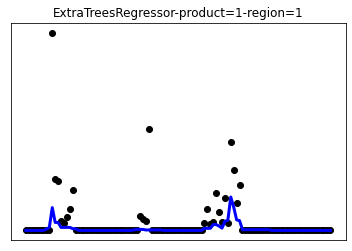

product=1, regsion=2, score=-6.17952205882353, best_train_model =ExtraTreesRegressor
test_Score=5.299999999999999


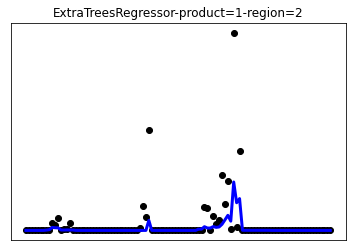

product=1, regsion=3, score=-10.934779411764705, best_train_model =ExtraTreesRegressor
test_Score=8.395238095238096


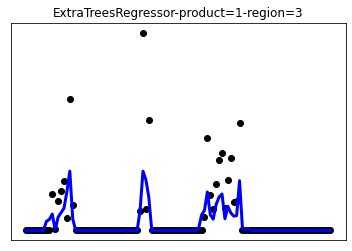

product=1, regsion=4, score=-22.88204411764706, best_train_model =ExtraTreesRegressor
test_Score=21.456190476190475


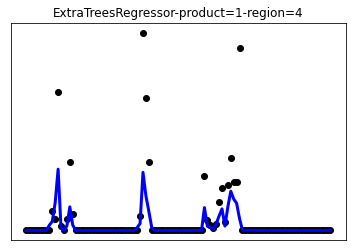

product=4, regsion=1, score=-18.664946895424837, best_train_model =ExtraTreesRegressor
test_Score=14.730423280423281


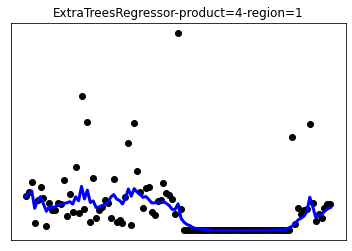

product=4, regsion=2, score=-9.043259803921568, best_train_model =ExtraTreesRegressor
test_Score=18.426190476190477


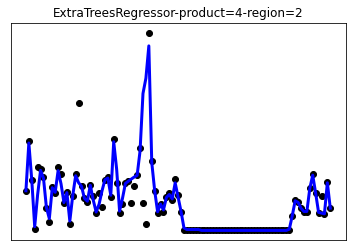

product=4, regsion=3, score=-90.76779411764706, best_train_model =KNeighborsRegressor
test_Score=44.81904761904762


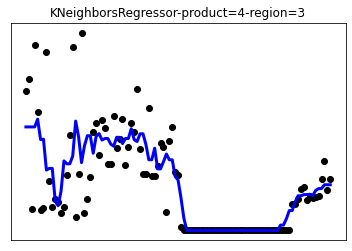

product=4, regsion=4, score=-35.59230392156863, best_train_model =ExtraTreesRegressor
test_Score=35.06984126984126


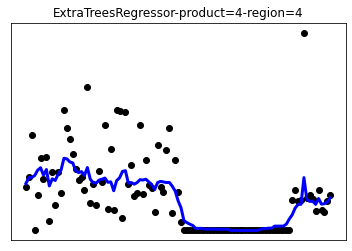

product=6, regsion=1, score=-26.40453510003644, best_train_model =huber
test_Score=47.31361943538112


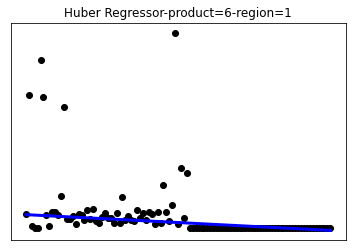

product=6, regsion=2, score=-15.081617647058824, best_train_model =KNeighborsRegressor
test_Score=16.583333333333332


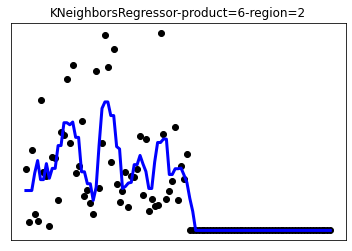

product=6, regsion=3, score=-39.47738970588235, best_train_model =KNeighborsRegressor
test_Score=68.80952380952381


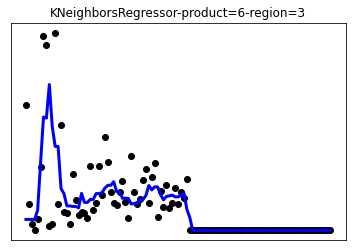

product=6, regsion=4, score=-38.373424369747895, best_train_model =KNeighborsRegressor
test_Score=57.857142857142854


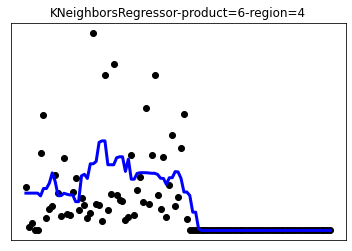

product=10, regsion=1, score=-42.05831858840578, best_train_model =huber
test_Score=55.84168796995102


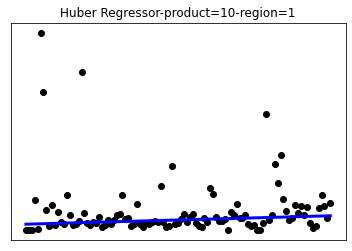

product=10, regsion=2, score=-47.523169117647065, best_train_model =ExtraTreesRegressor
test_Score=16.02238095238095


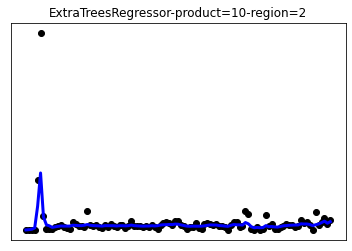

product=10, regsion=3, score=-134.83207516339868, best_train_model =ExtraTreesRegressor
test_Score=93.55661375661374


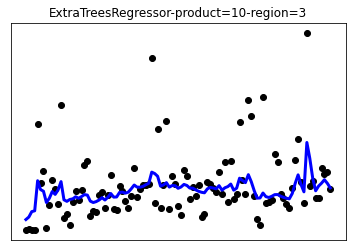

product=10, regsion=4, score=-52.647928220603056, best_train_model =huber
test_Score=48.956361685969355


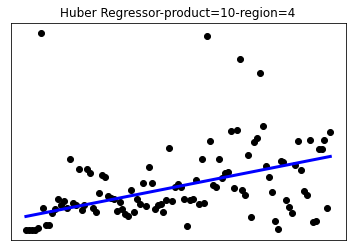

In [24]:
from sklearn.linear_model import HuberRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.linear_model import PassiveAggressiveRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression

from sklearn.model_selection import train_test_split
from numpy import arange
from numpy import reshape
#pipe_huber = Pipeline([('regressor' , HuberRegressor())])
from sklearn.model_selection import GridSearchCV
# Create param grid.
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions

from sklearn.metrics import mean_absolute_error

#init random_state
rs=4678

#The top 4 models selected from pycaret are huberregressor, extratreesregressor, passiveaggressiveregressor, KNNregressor
#setting up hyperparameter tuning, cross-validation, cost function
huber_params = [{'epsilon' : arange(1.05, 2, 0.05, dtype=float), 'alpha' : arange(0.00005, 0.0005, 0.00005, dtype=float)}]
huber=GridSearchCV(HuberRegressor(), param_grid = huber_params, cv=5, scoring='neg_mean_absolute_error')

ETR_params=[{'n_estimators':arange(5, 100, 5, dtype=int), 'criterion':['squared_error','absolute_error'], 'max_depth':[5,10,15,20]}]
ExtraTreesRegressor=GridSearchCV(ExtraTreesRegressor(random_state=rs), param_grid = ETR_params, cv=5, scoring='neg_mean_absolute_error')

PAR_params=[{'C': arange(0.1, 1.0, 0.1, dtype=float), 'max_iter':arange(100, 1000, 100, dtype=int)}]
PassiveAggressiveRegressor=GridSearchCV(PassiveAggressiveRegressor(random_state=rs), param_grid = PAR_params, cv=5, scoring='neg_mean_absolute_error')

KNN_params=[{'n_neighbors': arange(3, 10, 1, dtype=int),'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute'], 'n_jobs':[1,-1],'leaf_size':[3,5,10,15,20,25,30]}]
KNeighborsRegressor=GridSearchCV(KNeighborsRegressor(), param_grid = KNN_params, cv=5, scoring='neg_mean_absolute_error')


#init
Dict_best_score={}
best={}
best_train={}
Dict_best_params={}
best_params=[]

#4 products selected from 4 categories: 1, 4, 6, 10
for p in [1,4,6,10]: #product_num+1):  
     for r in range(1,5):
        data1=weeklydata.iloc[(week_num*4*(p-1)+week_num*(r-1)):((week_num*4*(p-1)+week_num*r)),:]
        #print(data1)
        data2=data1[['WEEKNO', 'ORDERQTY']]
        #print(data2)
        X=data2.iloc[:,0]
        X=X.values.reshape(-1,1)
        y=data2.iloc[:,1]
        #train and test split - 0.8:0.2
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
        
        #model fitting
        huber.fit(X_train.reshape(-1, 1), y_train)
        ExtraTreesRegressor.fit(X_train.reshape(-1, 1), y_train)
        PassiveAggressiveRegressor.fit(X_train.reshape(-1, 1), y_train)
        KNeighborsRegressor.fit(X_train.reshape(-1, 1), y_train)

        #calculate training scores and prediction scores for each model
        huber_train_mae= huber.best_score_
        huber_y_pred = huber.predict(X_test)
        huber_mae = mean_absolute_error(huber_y_pred, y_test)
        
        ETR_train_mae= ExtraTreesRegressor.best_score_
        ETR_y_pred = ExtraTreesRegressor.predict(X_test)
        ETR_mae = mean_absolute_error(ETR_y_pred, y_test)
        
        PAR_train_mae= PassiveAggressiveRegressor.best_score_
        PAR_y_pred = PassiveAggressiveRegressor.predict(X_test)
        PAR_mae = mean_absolute_error(PAR_y_pred, y_test)
        
        KNN_train_mae= KNeighborsRegressor.best_score_
        KNN_y_pred = KNeighborsRegressor.predict(X_test)
        KNN_mae = mean_absolute_error(KNN_y_pred, y_test)        
        
        #print the best trained model
        train_score=-100000
        if huber_train_mae>train_score:
            train_score=huber_train_mae
            best_train_params=huber.best_params_
            best_train_model='huber'
        if ETR_train_mae>train_score:
            train_score=ETR_train_mae
            best_train_params=ExtraTreesRegressor.best_params_
            best_train_model='ExtraTreesRegressor'
        if PAR_train_mae>train_score:
            train_score=PAR_train_mae
            best_train_params=PassiveAggressiveRegressor.best_params_
            best_train_model='PassiveAggressiveRegressor'
        if KNN_train_mae>train_score:
            train_score=KNN_train_mae
            best_train_params=KNeighborsRegressor.best_params_
            best_train_model='KNeighborsRegressor'
        best_train[best_train_model+'_'+str(p)+'_region_'+ str(r)]=[best_train_model, train_score, best_train_params]
        
        print(f"product={p}, regsion={r}, score={train_score}, best_train_model ={best_train_model}")
    
        #plot best trained model
        if best_train_model=='huber':
            print (f"test_Score={huber_mae}")
            plt.scatter(X, y, color="black",label="original")
            plt.plot(X, huber.predict(X), color="blue", label="predicted", linewidth=3)
            plt.title(f"Huber Regressor-product={p}-region={r}")
            plt.xticks(())
            plt.yticks(())
            plt.savefig(f"product={p}-region={r}.pdf")
            plt.show()
        elif best_train_model=='ExtraTreesRegressor':
            print (f"test_Score={ETR_mae}")
            plt.scatter(X, y, color="black",label="original")
            plt.plot(X, ExtraTreesRegressor.predict(X), color="blue", label="predicted", linewidth=3)
            plt.title(f"ExtraTreesRegressor-product={p}-region={r}")
            plt.xticks(())
            plt.yticks(())
            plt.savefig(f"product={p}-region={r}.pdf")
            plt.show()
        elif best_train_model=='PassiveAggressiveRegressor':
            print (f"test_Score={PAR_mae}")
            plt.scatter(X, y, color="black",label="original")
            plt.plot(X, PassiveAggressiveRegressor.predict(X), color="blue", label="predicted", linewidth=3)
            plt.title(f"PassiveAggressiveRegressor-product={p}-region={r}")
            plt.xticks(())
            plt.yticks(())
            plt.savefig(f"product={p}-region={r}.pdf")
            plt.show()
        elif best_train_model=='KNeighborsRegressor':
            print (f"test_Score={KNN_mae}")
            plt.scatter(X, y, color="black",label="original")
            plt.plot(X, KNeighborsRegressor.predict(X), color="blue", label="predicted", linewidth=3)
            plt.title(f"KNeighborsRegressor-product={p}-region={r}")
            plt.xticks(())
            plt.yticks(())
            plt.savefig(f"product={p}-region={r}.pdf")
            plt.show()
